# Chapter 3 - Linear Regression

- [Load Datasets](#Load-Datasets)
- [3.1 Simple Linear Regression](#3.1-Simple-Linear-Regression)
- [3.2 Multiple Linear Regression](#3.2-Multiple-Linear-Regression)
- [3.3 Other Considerations in the Regression Model](#3.3-Other-Considerations-in-the-Regression-Model)

In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')
pd.options.display.max_rows = 10

C:\Users\idsoo\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Load Datasets
Datasets available on http://www-bcf.usc.edu/~gareth/ISL/data.html

In [2]:
advertising = pd.read_csv('Data//Advertising.csv', usecols=[1,2,3,4])
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [3]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [4]:
credit = pd.read_csv('Data/Credit.csv', usecols=list(range(1,12)))
credit

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [5]:
credit['Student2'] = credit.Student.map({'No':0, 'Yes':1})
credit

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Student2
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,0
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560,0
396,13.364,3838,296,5,65,17,Male,No,No,African American,480,0
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138,0
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0,0


In [6]:
auto = pd.read_csv('Data/Auto.csv', na_values='?').dropna()
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [7]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


## 3.1 Simple Linear Regression

### Figure 3.1 - Least squares fit

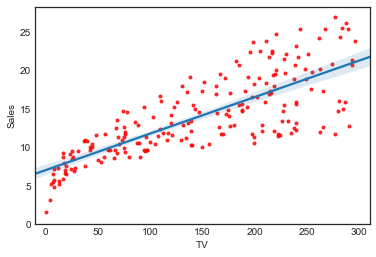

In [8]:
sns.regplot(advertising.TV, advertising.Sales, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,310)
plt.ylim(ymin=0);

> FIGURE 3.1. For the Advertising data, the least squares fit for the regression of sales onto TV is shown. The fit is found by minimizing the sum of squared errors. Each grey line segment represents an error, and the fit makes a compromise by averaging their squares. In this case a linear fit captures the essence of the relationship, although it is somewhat deficient in the left of the plot.


Let $\hat{y_i} = \hat{\beta}_0 + \hat{\beta}_1x_i$ be the prediction for Y based on the ith value of X. Then $e_i = y_i −\hat{y}i$ represents the ith residual—this is the difference between the ith observed response value and the ith response value that is predicted by our linear model. We define the residual sum of squares (RSS) as

$$ RSS = e_1^2+e_2^2+\dots+e_n^2$$

The least squares approach chooses $\hat{\beta}_0$ and $\hat{\beta}_1$ to minimize the RSS. Using some calculus, one can show that the minimizers are 

$$\hat{\beta}_1 = \frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}$$<p>
$$\hat{\beta}_0 = \bar{y} - \hat{\beta}_1\bar{x}$$

(Page 62). 

### Figure 3.2 - Regression coefficients - RSS
Note that the text in the book describes the coefficients based on uncentered data, whereas the plot shows the model based on centered data. The latter is visually more appealing for explaining the concept of a minimum RSS. I think that, in order not to confuse the reader, the values on the axis of the $\hat{\beta}_0$ coefficients have been changed to correspond with the text. The axes on the plots below are unaltered.

In [9]:
# Model Instantiation: Ordinary Least Squares (ols) 방식 linear regression

lm = smf.ols(formula='Sales ~ TV', data=advertising)   

# 'advertising' DataFrame에서 'Sales' column을 response로, 'TV' column을 feature로 하는
#  linear regression 모델을 정의함 

# 모델에게 학습 시키고, 그 결과인 (학습된) 모델을 'lm_learned'으로 받음 
lm_learned = lm.fit()

print(lm_learned.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 23 May 2018   Prob (F-statistic):           1.47e-42
Time:                        16:36:42   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

In [10]:
# Regression coefficients (Ordinary Least Squares)
regr = skl_lm.LinearRegression()

#X = scale(advertising.TV, with_mean=True, with_std=False).reshape(-1,1)
X = advertising[['TV']]
y = advertising['Sales']

regr.fit(X,y)

print(regr.intercept_)
print(regr.coef_)

7.032593549127693
[0.04753664]


In [11]:
# Create grid coordinates for plotting
B0 = np.linspace(regr.intercept_-4, regr.intercept_+4, 50)
B1 = np.linspace(regr.coef_-0.02,   regr.coef_+0.02,   50)

xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (RSS) based on grid of coefficients (y1 −β0−β1xX1)^2
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((advertising.Sales - xx[i,j] - advertising.TV * yy[i,j])**2).sum()/1000

# Minimized RSS
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = ((advertising.Sales - regr.intercept_ - advertising.TV * regr.coef_)**2).sum()/1000
min_rss

2.102530583131352

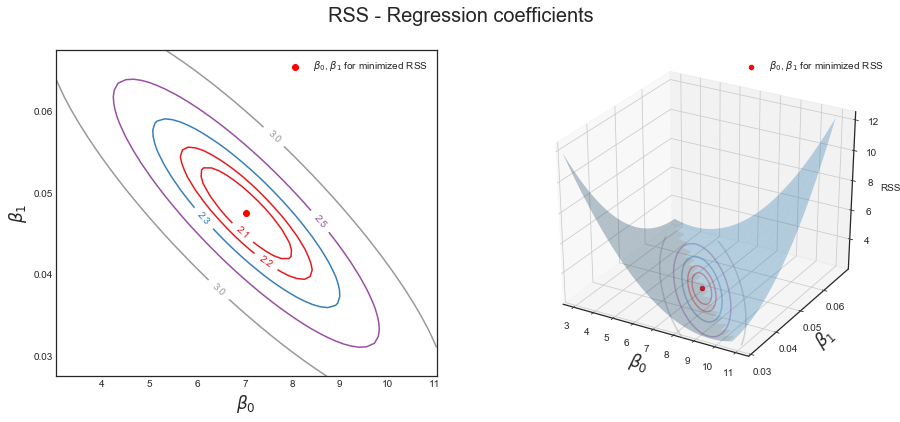

In [12]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(regr.intercept_, regr.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
            alpha=0.4, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax2.scatter3D(regr.intercept_, regr.coef_[0], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS')
ax2.set_zlim(Z.min(),Z.max())
ax2.set_ylim(0.03,0.07)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.set_yticks([0.03,0.04,0.05,0.06])
    ax.legend()

>FIGURE 3.2. Contour and three-dimensional plots of the RSS on the Advertising data, using sales as the response and TV as the predictor. The red dots correspond to the least squares estimates $\hat{\beta}_0$ and $\hat{\beta}_1$ , given by (3.4).


We continue the analogy with the estimation of the population mean μ of a random variable Y . A natural question is as follows: how accurate is the sample mean $\hat{\mu}$ as an estimate of $\mu$? We have established that the average of $\hat{\mu}$'s over many data sets will be very close to $\mu$, but that a single estimate $\hat{\mu}$ may be a substantial underestimate or overestimate of $\mu$. How far off will that single estimate of $\hat{\mu}$ be? In general, we answer this question by computing the standard error of $\hat{\mu}$, written as $SE(\hat{\mu})$. We have

$$Var(\hat{\mu}) = SE(\hat{\mu})^2 = \frac{\sigma^2}{n}$$ <p>
    
where $\sigma$ is the standard deviation of each of the realizations yi of Y . 2 Roughly speaking, the standard error tells us the average amount that this estimate $\hat{\mu}$ differs from the actual value of $\mu$. Equation 3.7 also tells us how this deviation shrinks with n—the more observations we have, the smaller the standard error of $\hat{\mu}$. In a similar vein, we can wonder how close $\hat{\beta_0}$ and $\hat{\beta_1}$ are to the true values $\beta_0$ and $\beta_1$. To compute the standard errors associated with $\beta_0$ and $\beta_1$, we use the following formulas:

$$SE(\hat{\beta_0})^2 =\large \sigma^2\begin{bmatrix}\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n(x_i - \bar{x})^2}\end{bmatrix}$$<br>
$$SE(\hat{\beta_1})^2 = \large \frac{\sigma^2}{\sum_{i=1}^2(x_i - \bar{x})^2}$$

where $\sigma^2 = Var(\epsilon)$. For these formulas to be strictly valid, we need to assume that the errors $\epsilon_i$ for each observation are uncorrelated with common variance $\sigma^2$. This is clearly not true in Figure 3.1, but the formula still turns out to be a good approximation. Notice in the formula that $SE(\hat{\beta_1})$ is smaller when the $x_i$ are more spread out; intuitively we have more leverage to estimate a slope when this is the case. We also see that $SE(\hat{\beta_0})$ would be the same as $SE(\hat{\mu}$ if $\bar{x}$ were zero (in which case $\hat{\beta_0}$ would be equal to $\bar{y}$). In general, $\sigma^2$ is not known, but can be estimated from the data. The estimate of $\sigma$ is known as the residual standard error, and is given by the formula $RSE = \sqrt{RSS/(n − 2)}$. Strictly speaking, when $\sigma^2$ is estimated from the data we should write $\hat{SE}(\hat{\beta}_1)$ to indicate that an estimate has been made, but for simplicity of notation we will drop this extra “hat”.

### Confidence interval on page 67 & Table 3.1 & 3.2 - Statsmodels 

In [50]:
est = smf.ols('Sales ~ TV', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 23 May 2018   Prob (F-statistic):           1.47e-42
Time:                        16:46:07   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# RSS with regression coefficients
((advertising.Sales - (est.params[0] + est.params[1]*advertising.TV))**2).sum()/1000

2.1025305831313514

Computing correlation


C:\Users\idsoo\Anaconda3\lib\site-packages\biokit\viz\linkage.py:41: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(D, method=method, metric=metric)


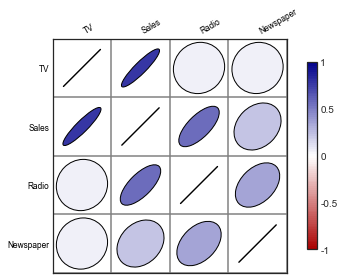

In [15]:
from biokit.viz import corrplot
c = corrplot.Corrplot(advertising)
c.plot()

### Table 3.1 & 3.2 - Scikit-learn

Standard errors can also be used to perform hypothesis tests on the coefficients. The most common hypothesis test involves testing the null hypothesis of

$$\text{H0 : There is no relationship between X and Y}$$

versus the alternative hypothesis

$$\text{Ha : There is some relationship between X and Y}$$

Mathematically, this corresponds to testing

$$H_0 : \beta_1 = 0$$

versus

$$H_a : \beta_1 = 0,$$

since if $\beta_1 = 0$ then the model (3.5) reduces to $Y = \beta_0 + \epsilon$, and X is not associated with Y . To test the null hypothesis, we need to determine whether $\hat{\beta}_1$, our estimate for $\beta_1$, is sufficiently far from zero that we can be confident that $\beta_1$ is non-zero. How far is far enough? This of course depends on the accuracy of $\\hat{beta}_1$—that is, it depends on $SE(\hat{\beta}_1)$. If $SE(\hat{\beta}_1)$ is small, then even relatively small values of $SE(\hat{\beta}_1)$ may provide strong evidence that $\beta_1\neq0$, and hence that there is a relationship between X and Y . In contrast, if $SE(\hat{\beta}_1)$ is large, then $\hat{\beta}_1$ must be large in absolute value in order for us to reject the null hypothesis. In practice, we compute a ***t-statistic***, given by

$$t = \frac{\hat{\beta}_1-0}{SE(\hat{\beta}_1)}$$

which measures the number of standard deviations that $\hat{\beta}_1$ is away from 0. If there really is no relationship between X and Y , then we expect that (3.14) will have a t-distribution with n − 2 degrees of freedom. The tdistribution has a bell shape and for values of n greater than approximately 30 it is quite similar to the normal distribution. Consequently, it is a simple matter to compute the probability of observing any number equal to |t| or larger in absolute value, assuming $\beta_1=0$. We call this probability the p-value.<br>
Roughly speaking, we interpret the p-value as follows: a small p-value indicates that it is unlikely to observe such a substantial association between the predictor and the response. Hence, if we see a small p-value, then we can infer that there is an association between the predictor and the response. We reject the null hypothesis—that is, we declare a relationship to exist between X and Y —if the p-value is small enough. Typical p-value cutoffs for rejecting the null hypothesis are 5 or 1 %. When n = 30, these correspond to t-statistics (3.14) of around 2 and 2.75, respectively.


In [16]:
regr = skl_lm.LinearRegression()

X = advertising[['TV']]
y = advertising['Sales']

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

7.032593549127693
[0.04753664]


In [17]:
smf.ols('Sales~TV', advertising).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


>Table 3.1 provides details of the least squares model for the regression of number of units sold on TV advertising budget for the Advertising data.***Notice that the coefficients for $\hat{\beta}_0$ and $\hat{\beta}_1$ are very large relative to their standard errors, so the t-statistics are also large;*** the probabilities of seeing such values if $H_0$ is true are virtually zero. Hence we can conclude that $\beta_0 \neq 0$ and $\beta_1 \neq 0$

#### $R^2$ Statistic

The RSE provides an absolute measure of lack of fit of the model (3.5) to the data. But since it is measured in the units of Y , it is not always clear what constitutes a good RSE. The $R^2$ statistic provides an alternative measure of fit. It takes the form of a ***proportion—the proportion of variance explained***—and so it always takes on a value between 0 and 1, and is independent of the scale of Y .
To calculate R2, we use the formula

$$R^2 = \frac{TSS - RSS}{TSS} = 1 - \frac{RSS}{TSS}$$ 
where $TSS = \sum(y_i − \bar{y})^2$ is the total sum of squares. Hence, $TSS − RSS$ measures the amount of variability in the response that is explained (or removed) by performing the regression, and $R^2$ measures the proportion of variability in Y that can be explained using X. An $R^2$ statistic that is close to 1 indicates that a large proportion of the variability in the response has been explained by the regression. A number near 0 indicates that the regression did not explain much of the variability in the response; this might occur because the linear model is wrong, or the inherent error $\sigma^2$ is high, or both. In Table 3.2, the $R^2$ was 0.61, and so just under two-thirds of the variability in sales is explained by a linear regression on TV.<br>
In fact, it can be shown that ***in the simple linear regression setting, $R^2 = r^2$***. In other words, the squared correlation and the $R^2$  statistic are identical. However, in the next section we will discuss the multiple linear regression problem, in which we use several predictors simultaneously to predict the response. The concept of correlation between the predictors and the response does not extend automatically to this setting, since correlation quantifies the association between a single pair of variables rather than between a larger number of variables. We will see that $R^2$  fills this role.


In [18]:
#R^2
Sales_pred = regr.predict(X)
r2_score(y, Sales_pred)

0.611875050850071

#### Residual Standard Error

Recall from the model (3.5) that associated with each observation is an error term $\epsilon$. Due to the presence of these error terms, even if we knew the true regression line (i.e. even if $\beta_0$ and $\beta_1$ were known), we would not be able to perfectly predict Y from X. The RSE is an estimate of the standard
deviation of $\epsilon$. Roughly speaking, it is the average amount that the response will deviate from the true regression line. It is computed using the formula

$$RSE = \sqrt{\frac{1}{n-p-1}RSS}= \sqrt{\frac{1}{n-p-1}\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Note that RSS was defined in Section 3.1.1, and is given by the formula

$$RSS = \sum_{i=1}^n(y_i − \hat{y}_i)^2$$


In [19]:
#RSE manual calculation
np.sqrt(((advertising.Sales - regr.intercept_ - advertising.TV * regr.coef_)**2).sum()/(est.nobs-2))

3.258656368650463

In [51]:
#RSE call
np.sqrt(est.scale)

3.258656368650463

In the case of the advertising data, we see from the linear regression output in Table 3.2 that the RSE is 3.26. In other words, ***actual sales in each market deviate from the true regression line by approximately 3,260 units, on average***. Another way to think about this is that even if the model were correct and the true values of the unknown coefficients $\beta_0$ and $\beta_1$ were known exactly, any prediction of sales on the basis of TV advertising would still be off by about 3,260 units on average. Of course, whether or not 3,260 units is an acceptable prediction error depends on the problem context. In the advertising data set, the mean value of sales over all markets is approximately 14,000 units, and so the percentage error is 3,260/14,000 = 23 %.
The RSE is considered a measure of the ***lack of fit*** of the model (3.5) to the data. If the predictions obtained using the model are very close to the true outcome values—that is, if $\hat{y}_i \approx y_i$ for $i = 1,...,n$ —then (3.15) will be small, and we can conclude that the model fits the data very well. On the other hand, if $\hat{y}_i$ is very far from yi for one or more observations, then the RSE may be quite large, indicating that the model doesn’t fit the data well.

(Page 69). 

#### Sales prediction when TV=100,

$$y = \beta_0 + \beta_1x$$
$$y = 7.0326 + 0.0475 \times x$$

In [20]:
est.predict(pd.DataFrame({'TV':[100]}))

0    11.786258
dtype: float64

## 3.2 Multiple Linear Regression

### 3.2.2 Some Important Questions

#### One: Is There a Relationship Between the Response and Predictors?

We test the null hypothesis, 

$$H_0 : \beta_1 = \beta_2 = \dots = \beta_p = 0$$

versus the alternative 

$$H_a : \text{at least one } \beta_j \text{ is non-zero}$$

This hypothesis test is performed by computing the *** F-statistic***,

$$F = \frac{(TSS-RSS)/p}{RSS/(n-p-1)}$$

### Table 3.3 - Statsmodels

In [21]:
est = smf.ols('Sales ~ Radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
Radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [22]:
est = smf.ols('Sales ~ Newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
Newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


### Table 3.4 & 3.6 - Statsmodels

In [52]:
est = smf.ols('Sales ~ TV + Radio + Newspaper', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 23 May 2018   Prob (F-statistic):           1.58e-96
Time:                        16:54:34   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
#F Statistic p-value
est.f_pvalue

1.575227256092437e-96

In [53]:
#RSE
np.sqrt(est.scale)

1.685510373414744

#### Two: Deciding on Important Variables
Ideally, we would like to perform variable selection by trying out a lot of different models, each containing a different subset of the predictors. For instance, if p = 2, then we can consider four models: (1) a model containing no variables, (2) a model containing X1 only, (3) a model containing $X_2$ only, and (4) a model containing both $X_1$ and $X_2$. We can then select the best model out of all of the models that we have considered. How do we determine which model is best? Various statistics can be used to judge the quality of a model. These include Mallow’s Cp, Akaike information criterion (AIC), Bayesian information criterion (BIC), and adjusted R2. These are discussed in more detail in Chapter 6. We can also determine which model is best by plotting various model outputs, such as the residuals, in order to search for patterns.
 
-  Forward selection. We begin with the null model—a model that contains an intercept but no predictors. We then fit p simple linear regressions and add to the null model the variable that results in the lowest RSS. We then add to that model the variable that results in the lowest RSS for the new two-variable model. This approach is continued until some stopping rule is satisfied.
- Backward selection. We start with all variables in the model, and remove the variable with the largest p-value—that is, the variable that is the least statistically significant. The new (p − 1)-variable model is fit, and the variable with the largest p-value is removed. This procedure continues until a stopping rule is reached. For instance, we may stop when all remaining variables have a p-value below some threshold.
- Mixed selection. This is a combination of forward and backward selection. We start with no variables in the model, and as with forward selection, we add the variable that provides the best fit. We continue to add variables one-by-one. Of course, as we noted with the Advertising example, the p-values for variables can become larger as new predictors are added to the model. Hence, if at any point the p-value for one of the variables in the model rises above a certain threshold, then we remove that variable from the model. We continue to perform these forward and backward steps until all variables in the model have a sufficiently low p-value, and all variables outside the model would have a large p-value if added to the model.

#### Three: Model Fit

Two of the most common numerical measures of model fit are the RSE and $R^2$, the fraction of variance explained. These quantities are computed and interpreted in the same fashion as for simple linear regression. Recall that in simple regression, $R^2$ is the square of the correlation of the response and the variable. In multiple linear regression, it turns out that it equals $Cor(Y, \hat{Y})^2$, the square of the correlation between the response and the fitted linear model; in fact one property of the fitted linear model is that it maximizes this correlation among all possible linear models. <br>
An $R^2$ value close to 1 indicates that the model explains a large portion of the variance in the response variable. As an example, we saw in Table 3.6 that for the Advertising data, the model that uses all three advertising media to predict sales has an $R^2$ of 0.8972. On the other hand, the model that uses only TV and radio to predict sales has an $R^2$ value of 0.89719. In other words, there is a small increase in $R^2$ if we include newspaper advertising in the model that already contains TV and radio advertising, even though we saw earlier that the p-value for newspaper advertising in Table 3.4 is not significant. It turns out that $R^2$ will always increase when more variables are added to the model, even if those variables are only weakly associated with the response. This is due to the fact that adding another variable to the least squares equations must allow us to fit the training data (though not necessarily the testing data) more accurately. Thus, the $R^2$ statistic, which is also computed on the training data, must increase. The fact that adding newspaper advertising to the model containing only TV and radio advertising leads to just a tiny increase in $R^2$ provides additional evidence that newspaper can be dropped from the model. Essentially, newspaper provides no real improvement in the model fit to the training samples, and its inclusion will likely lead to poor results on independent test samples due to overfitting.

The model that contains only TV and radio as predictors has an RSE of 1.681, and the model that also contains newspaper as a predictor has an RSE of 1.686 (Table 3.6). In contrast, the model that contains only TV has an RSE of 3.26 (Table 3.2). This corroborates our previous conclusion that a model that uses TV and radio expenditures to predict sales is much more accurate (on the training data) than one that only uses TV spending. Furthermore, given that TV and radio expenditures are used as predictors, there is no point in also using newspaper spending as a predictor in the model. The observant reader may wonder how RSE can increase when newspaper is added to the model given that RSS must decrease. Thus, models with more variables can have higher RSE if the decrease in RSS is small relative to the increase in p.

In addition to looking at the RSE and $R^2$ statistics just discussed, it can be useful to plot the data. Graphical summaries can reveal problems with a model that are not visible from numerical statistics. For example, Figure 3.5 displays a three-dimensional plot of TV and radio versus sales. We see that some observations lie above and some observations lie below the least squares regression plane. In particular, the linear model seems to overestimate sales for instances in which most of the advertising money was spent exclusively on either TV or radio. It underestimates sales for instances where the budget was split between the two media. This pronounced non-linear pattern cannot be modeled accurately using linear regression. It suggests a synergy or interaction effect between the advertising media, whereby combining the media together results in a bigger boost to sales than using any single medium. In Section 3.3.2, we will discuss extending the linear model to accommodate such synergistic effects through the use of interaction terms.



### Table 3.5 - Correlation Matrix

In [24]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


### Figure 3.5 - Multiple Linear Regression

In [68]:
est_fit = smf.ols('Sales~ TV + Radio', advertising).fit()
est_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 23 May 2018   Prob (F-statistic):           4.83e-98
Time:                        23:26:29   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
regr = skl_lm.LinearRegression()

X = advertising[['Radio', 'TV']]
y = advertising['Sales']

regr.fit(X, y)
print(regr.coef_)
print(regr.intercept_)

[0.18799423 0.04575482]
2.9210999124051398


In [26]:
# What are the min/max values of Radio & TV?
# Use these values to set up the grid for plotting.
advertising[['Radio', 'TV']].describe()

,Radio,TV
count,200.000000,200.000000
mean,23.264000,147.042500
std,14.846809,85.854236
min,0.000000,0.700000
25%,9.975000,74.375000
50%,22.900000,149.750000
75%,36.525000,218.825000
max,49.600000,296.400000


In [63]:
# Create a coordinate grid
Radio = np.arange(0, 50)
TV    = np.arange(0,300)

B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(regr.intercept_ + B1[i,j]*regr.coef_[0] + B2[i,j]*regr.coef_[1])

Text(0.5,0,'Sales')

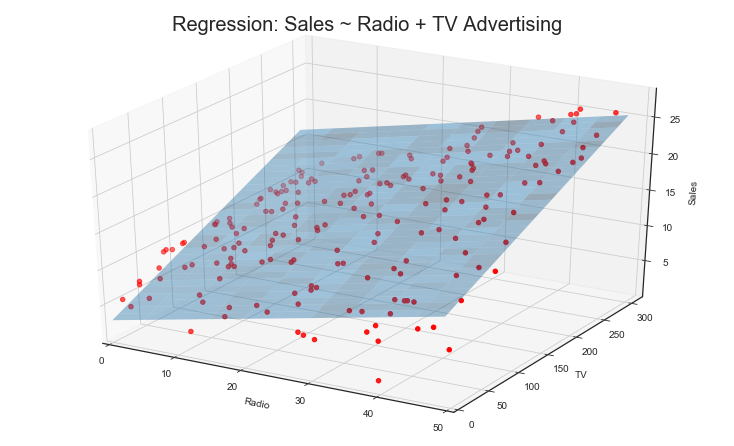

In [65]:
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Regression: Sales ~ Radio + TV Advertising', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(advertising.Radio, advertising.TV, advertising.Sales, c='r')

ax.set_xlabel('Radio')
ax.set_xlim(0, 50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Sales')

## 3.3 Other Considerations in the Regression Model

### 3.3.1 Qualitative Predictors

. 

In [89]:
credit

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Student2
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,0
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560,0
396,13.364,3838,296,5,65,17,Male,No,No,African American,480,0
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138,0
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0,0


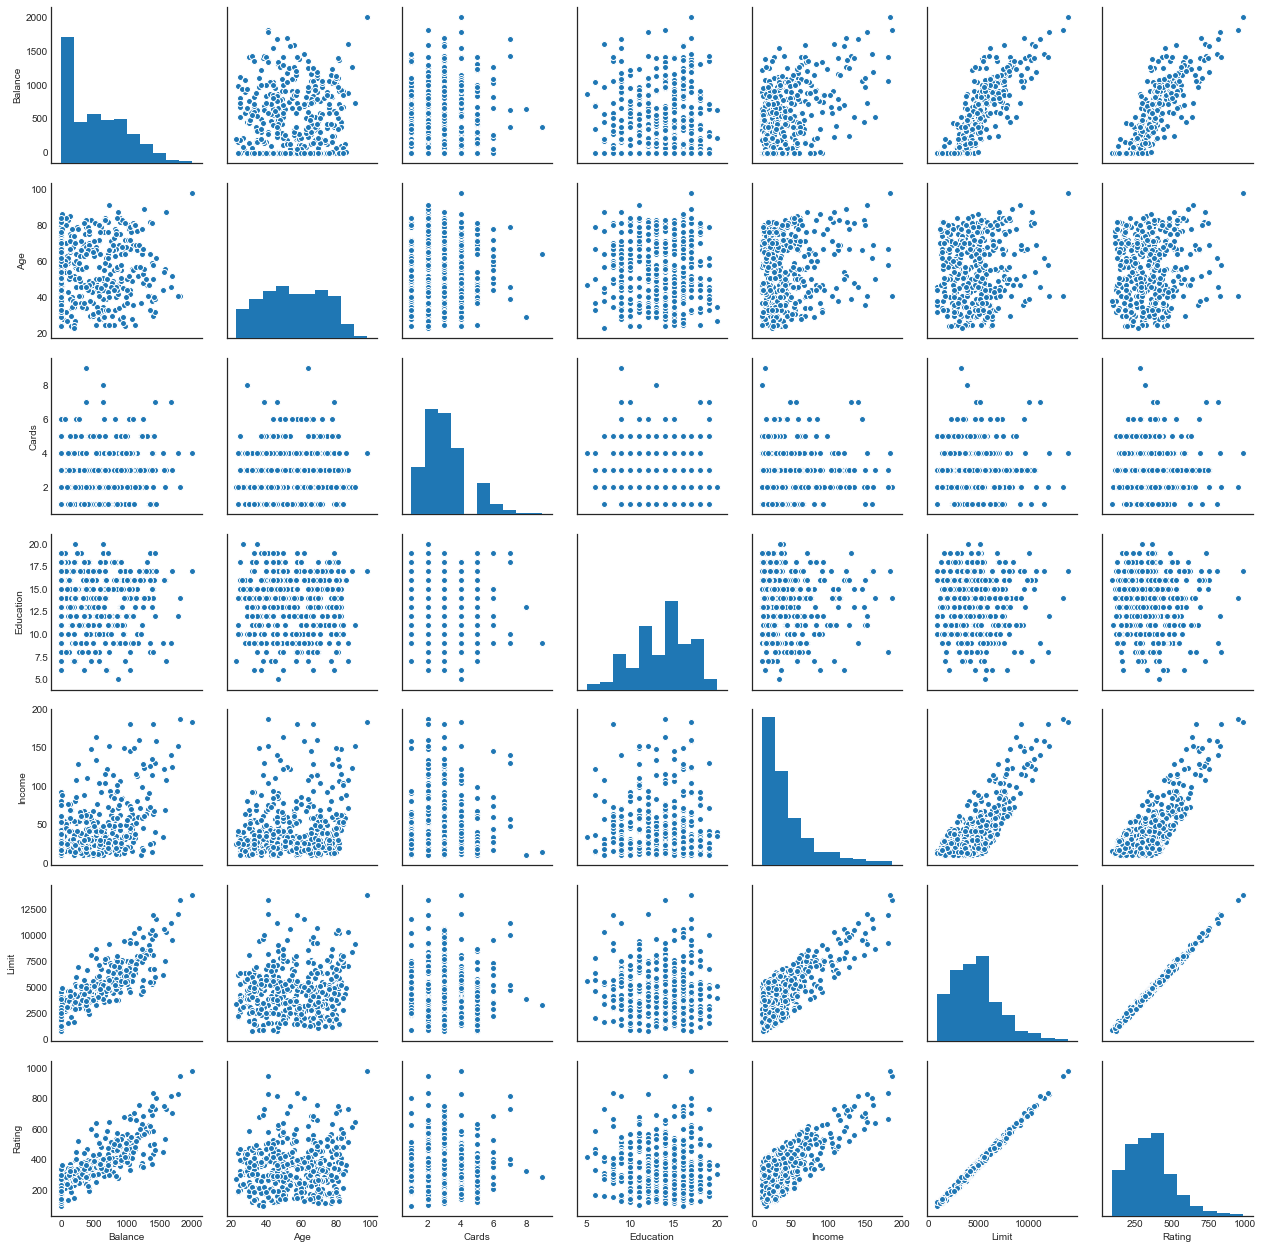

In [92]:
# Figure 3.6
sns.pairplot(credit[['Balance','Age','Cards','Education','Income','Limit','Rating']]);

> FIGURE 3.6. The Credit data set contains information about balance, age, cards, education, income, limit, and rating for a number of potential customers.


#### Predictors with Only Two Levels

Table 3.7 displays the coefficient estimates and other information associated with the model (3.27). The average credit card debt for males is estimated to be \$509.80, whereas females are estimated to carry \$19.73 in additional debt for a total of \$509.80 + \$19.73 = \$529.53. However, we notice that the p-value for the dummy variable is very high. This indicates that there is no statistical evidence of a difference in average credit card balance between the genders.

In [93]:
#  Table 3.7
est = smf.ols('Balance ~ Gender', credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,509.8031,33.128,15.389,0.000,444.675,574.931
Gender[T.Female],19.7331,46.051,0.429,0.669,-70.801,110.267


> TABLE 3.7. Least squares coefficient estimates associated with the regression of balance onto gender in the Credit data set. The linear model is given in (3.27). That is, gender is encoded as a dummy variable, as in (3.26).


#### Qualitative Predictors with More than Two Levels

From Table 3.8, we see that the estimated balance for the baseline, African American, is \$531.00. It is estimated that the Asian category will have \$18.69 less debt than the African American category, and that the Caucasian category will have \$12.50 less debt than the African American category. However, the p-values associated with the coefficient estimates for the two dummy variables are very large, suggesting no statistical evidence of a real difference in credit card balance between the ethnicities. Once again, the level selected as the baseline category is arbitrary, and the final predictions for each group will be the same regardless of this choice. However, the coefficients and their p-values do depend on the choice of dummy variable coding. Rather than rely on the individual coefficients, we can use an F-test to test H0 : $\beta_1 = \beta_2 = 0$; this does not depend on the coding. This F-test has a p-value of 0.96, indicating that we cannot reject the null hypothesis that there is no relationship between balance and ethnicity.

(Page 86). 

In [103]:
# Table 3.8
est = smf.ols('Balance ~ Ethnicity', credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,531.0000,46.319,11.464,0.000,439.939,622.061
Ethnicity[T.Asian],-18.6863,65.021,-0.287,0.774,-146.515,109.142
Ethnicity[T.Caucasian],-12.5025,56.681,-0.221,0.826,-123.935,98.930


In [102]:
est.f_pvalue

0.9574918881199579

### 3.3.2 Extensions of the Linear Model

The standard linear regression model (3.19) provides interpretable results and works quite well on many real-world problems. However, it makes several highly restrictive assumptions that are often violated in practice. Two of the most important assumptions state that the relationship between the predictors and response are ***additive and linear***. The additive assumption means that the effect of changes in a predictor $X_j$ on the response $Y$ is independent of the values of the other predictors. The linear assumption states that the change in the response $Y$ due to a one-unit change in $X_j$ is constant, regardless of the value of $X_j$. In this book, we examine a number of sophisticated methods that relax these two assumptions. Here, we briefly examine some common classical approaches for extending the linear model.

#### Removing the Additive Assumption

In our previous analysis of the Advertising data, we concluded that both TV and radio seem to be associated with sales. The linear models that formed the basis for this conclusion assumed that the effect on sales of increasing one advertising medium is independent of the amount spent on the other media. For example, the linear model (3.20) states that the average effect on sales of a one-unit increase in TV is always $\beta_1$, regardless of the amount spent on radio. However, this simple model may be incorrect. Suppose that spending money on radio advertising actually increases the effectiveness of TV advertising, so that the slope term for TV should increase as radio increases. In this situation, given a fixed budget of \$100,000, spending half on radio and half on TV may increase sales more than allocating the entire amount to either TV or to radio. In marketing, this is known as a ***synergy effect***, and in statistics it is referred to as an interaction effect. Figure 3.5 suggests that such an effect may be present in the advertising data. Notice that when levels of either TV or radio are low, then the true sales are lower than predicted by the linear model. But when advertising is split between the two media, then the model tends to underestimate sales.<br>
Consider the standard linear regression model with two variables, 

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \epsilon$$

According to this model, if we increase $X_1$ by one unit, then Y will increase by an average of $\beta_1$ units. Notice that the presence of $X_2$ does not alter this statement—that is, regardless of the value of $X_2$, a one-unit increase in $X_1$ will lead to a $\beta_1$-unit increase in Y . One way of extending this model to allow for interaction effects is to include a third predictor, called an ***interaction term***, which is constructed by computing the product of $X_1$ and $X_2$. This results in the model 

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_1X_2 + \epsilon$$

How does inclusion of this interaction term relax the additive assumption? Notice that (3.31) can be rewritten as

$$Y = \beta_0 + (\beta_1 + \beta_3X_2)X_1 + \beta_2X_2 + \epsilon$$
$$  = \beta_0 + \tilde{\beta}_1X_1 + \beta_2X_2 + \epsilon$$

where $\tilde{\beta}_1 = \beta_1 + \beta_3X_2$. Since $\tilde{\beta}_1$ changes with $X_2$, the effect of $X_1$ on $Y$ is no longer constant: adjusting $X_2$ will change the impact of $X_1$ on $Y$.<p>
We can interpret $\beta_3$ as the increase in the effectiveness of TV advertising for a one unit increase in radio advertising (or vice-versa). The coefficients that result from fitting the model (3.33) are given in Table 3.9.

The results in Table 3.9 strongly suggest that the model that includes the interaction term is superior to the model that contains only main effects. The p-value for the interaction term, TV\timesradio, is extremely low, indicating that there is strong evidence for $H_a : \beta_3 \neq 0$. In other words, it is clear that the true relationship is not additive. The $R_2$ for the model (3.33) is 96.8%, compared to only 89.7% for the model that predicts sales using TV and radio without an interaction term. This means that (96.8 − 89.7)/(100 − 89.7) = 69% of the variability in sales that remains after fitting the additive model has been explained by the interaction term. The coefficient estimates in Table 3.9 suggest that an increase in TV advertising of \$1,000 is associated with increased sales of $(\hat{\beta}_1+\hat{\beta}_3\times radio)\times1,000 = 19+1.1\times radio$ units. And an increase in radio advertising of \$1,000 will be associated with an increase in sales of $(\hat{\beta}_2 + \hat{\beta}_3 \times TV) \times 1,000 = 29 + 1.1 \times TV$ units.

In this example, the p-values associated with TV, radio, and the interaction term all are statistically significant (Table 3.9), and so it is obvious that all three variables should be included in the model. However, it is sometimes the case that an interaction term has a very small p-value, but the associated main effects (in this case, TV and radio) do not. ***The hierarchical principle states that if we include an interaction in a model, we should also include the main effects, even if the p-values associated with their coefficients are not significant***. In other words, if the interaction between $X_1$ and $X_2$ seems important, then we should include both $X_1$ and $X_2$ in the model even if their coefficient estimates have large p-values. The rationale for this principle is that if $X_1 \times X_2$ is related to the response, then whether or not the coefficients of $X_1$ or $X_2$ are exactly zero is of little interest. Also $X_1 \times X_2$ is typically correlated with $X_1$ and $X_2$, and so leaving them out tends to alter the meaning of the interaction.

In [104]:
# Table 3.9 - Interaction Variables
est = smf.ols('Sales ~ TV + Radio + TV*Radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
Radio,0.0289,0.009,3.241,0.001,0.011,0.046
TV:Radio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


In [105]:
est.rsquared

0.9677905498482523

>TABLE 3.9. For the Advertising data, least squares coefficient estimates associated with the regression of sales onto TV and radio, with an interaction term, as in (3.33).



Consider the Credit data set from Section 3.3.1, and suppose that we wish to predict balance using the income (quantitative) and student (qualitative) variables. 

Once again, we have two different regression lines for the students and the non-students. But now those regression lines have different intercepts, $\beta_0+\beta_2$ versus $\beta_0$, as well as different slopes, $\beta_1+\beta_3$ versus $\beta_1$. This allows for the possibility that changes in income may affect the credit card balances of students and non-students differently. The right-hand panel of Figure 3.7 shows the estimated relationships between income and balance for students and non-students in the model (3.35). We note that the slope for students is lower than the slope for non-students. This suggests that increases in income are associated with smaller increases in credit card balance among students as compared to non-students.

(Page 90). 

In [33]:
# Figure 3.7 - Interaction between qualitative and quantative variables

est1 = smf.ols('Balance ~ Income + Student2', credit).fit()
regr1 = est1.params
est2 = smf.ols('Balance ~ Income + Income*Student2', credit).fit()
regr2 = est2.params

print('Regression 1 - without interaction term')
print(regr1)
print('\nRegression 2 - with interaction term')
print(regr2)

Regression 1 - without interaction term
Intercept    211.142964
Income         5.984336
Student2     382.670539
dtype: float64

Regression 2 - with interaction term
Intercept          200.623153
Income               6.218169
Student2           476.675843
Income:Student2     -1.999151
dtype: float64


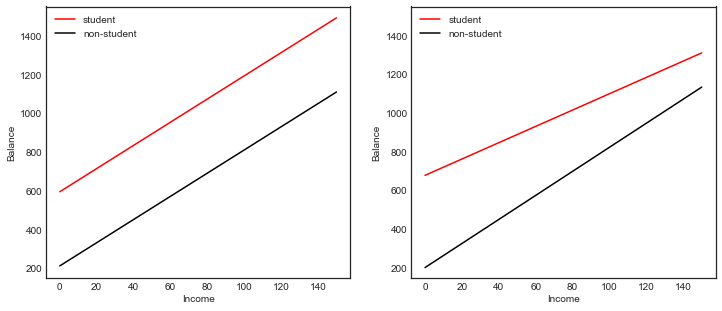

In [34]:
# Income (x-axis)
income = np.linspace(0,150)

# Balance without interaction term (y-axis)
student1     = np.linspace(regr1['Intercept']+regr1['Student2'],
                           regr1['Intercept']+regr1['Student2']+150*regr1['Income'])
non_student1 = np.linspace(regr1['Intercept'], 
                           regr1['Intercept']+150*regr1['Income'])

# Balance with iteraction term (y-axis)
student2     = np.linspace(regr2['Intercept']+regr2['Student2'],
                           regr2['Intercept']+regr2['Student2']+150*(regr2['Income']+regr2['Income:Student2']))
non_student2 = np.linspace(regr2['Intercept'], 
                           regr2['Intercept']+150*regr2['Income'])

# Create plot
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(income, student1, 'r', income, non_student1, 'k')
ax2.plot(income, student2, 'r', income, non_student2, 'k')

for ax in fig.axes:
    ax.legend(['student', 'non-student'], loc=2)
    ax.set_xlabel('Income')
    ax.set_ylabel('Balance')
    ax.set_ylim(ymax=1550)

>FIGURE 3.7. For the Credit data, the least squares lines are shown for prediction of balance from income for students and non-students. Left: The model (3.34) was fit. There is no interaction between income and student. Right: The model (3.35) was fit. There is an interaction term between income and student.



#### Non-linear Relationships

As discussed previously, the linear regression model (3.19) assumes a linear relationship between the response and predictors. But in some cases, the true relationship between the response and the predictors may be nonlinear. Here we present a very simple way to directly extend the linear model to accommodate non-linear relationships, using ***polynomial regression***. In
later chapters, we will present more complex approaches for performing non-linear fits in more general settings.
Consider Figure 3.8, in which the mpg (gas mileage in miles per gallon) versus horsepower is shown for a number of cars in the Auto data set. The
orange line represents the linear regression fit. There is a pronounced relationship between mpg and horsepower, but it seems clear that this relationship is in fact non-linear: the data suggest a curved relationship. A simple approach for incorporating non-linear associations in a linear model is to include transformed versions of the predictors in the model. For example, the points in Figure 3.8 seem to have a ***quadratic shape***, suggesting that a
model of the form

$$mpg = \beta_0 + \beta_1 \times horsepower + \beta_2 \times horsepower^2 + \epsilon$$

may provide a better fit. Equation 3.36 involves predicting mpg using a non-linear function of horsepower. But it is still a linear model! That is, (3.36) is simply a multiple linear regression model with $X_1 = horsepower$ and $X_2 = horsepower^2$. So we can use standard linear regression software to estimate $\beta_0, \beta_1,$ and $\beta_2$ in order to produce a non-linear fit. The blue curve in Figure 3.8 shows the resulting quadratic fit to the data. The quadratic fit appears to be substantially better than the fit obtained when just the linear term is included. 
(Page 91). 

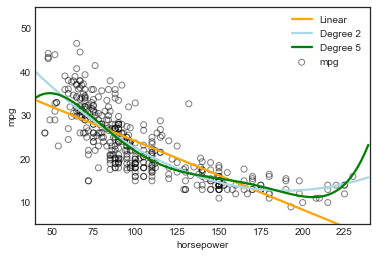

In [35]:
### Figure 3.8 - Non-linear relationships
# With Seaborn's regplot() you can easily plot higher order polynomials.
plt.scatter(auto.horsepower, auto.mpg, facecolors='None', edgecolors='k', alpha=.5) 
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Linear', scatter=False, color='orange')
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 2', order=2, scatter=False, color='lightblue')
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 5', order=5, scatter=False, color='g')
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);

> FIGURE 3.8. The Auto data set. For a number of cars, mpg and horsepower are shown. The linear regression fit is shown in orange. The linear regression fit for a model that includes $horsepower^2$ is shown as a blue curve. The linear regression fit for a model that includes all polynomials of horsepower up to fifth-degree is shown in green.


The $R^2$ of the quadratic fit is 0.688, compared to 0.606 for the linear fit, and the p-value in Table 3.10 for the quadratic term is highly significant.<br>
If including $horsepower^2$ led to such a big improvement in the model, why not include $horsepower^3, horsepower^4$, or even $horsepower^5$? The green curve in Figure 3.8 displays the fit that results from including all polynomials up to fifth degree in the model (3.36). The resulting fit seems unnecessarily wiggly—that is, it is unclear that including the additional terms really has led to a better fit to the data.<br>
The approach that we have just described for extending the linear model to accommodate non-linear relationships is known as polynomial regression, since we have included polynomial functions of the predictors in the regression model. We further explore this approach and other non-linear extensions of the linear model in Chapter 7.


In [36]:
### Table 3.10
auto['horsepower2'] = auto.horsepower**2
auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,16900.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,27225.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,22500.0


In [37]:
est = smf.ols('mpg ~ horsepower + horsepower2', auto).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,56.9001,1.800,31.604,0.000,53.360,60.440
horsepower,-0.4662,0.031,-14.978,0.000,-0.527,-0.405
horsepower2,0.0012,0.000,10.080,0.000,0.001,0.001


>TABLE 3.10. For the Auto data set, least squares coefficient estimates associated with the regression of mpg onto horsepower and horsepower2.



### 3.3.3 Potential Problems 

When we fit a linear regression model to a particular data set, many problems may occur. Most common among these are the following: 

1. Non-linearity of the response-predictor relationships. 
2. Correlation of error terms. 
3. Non-constant variance of error terms. 
4. Outliers. 
5. High-leverage points. 
6. Collinearity.

(Page 92). 

#### 1. Non-linearity of the Data 
The linear regression model assumes that there is a straight-line relationship between the predictors and the response. If the true relationship is far from linear, then virtually all of the conclusions that we draw from the fit are suspect. In addition, the prediction accuracy of the model can be significantly reduced.<br>
***Residual plots*** are a useful graphical tool for identifying non-linearity. Given a simple linear regression model, we can plot the residuals, $e_i = y_i − \hat{y}_i$, versus the predictor $x_i$. In the case of a multiple regression model,since there are multiple predictors, we instead plot the residuals versus the predicted (or $fitted$) values $\hat{y}_i$. Ideally, the residual plot will show no fitted discernible pattern. The presence of a pattern may indicate a problem with some aspect of the linear model.<br> The left panel of Figure 3.9 displays a residual plot from the linear regression of mpg onto horsepower on the Auto data set that was illustrated in Figure 3.8. The red line is a smooth fit to the residuals, which is displayed in order to make it easier to identify any trends. The residuals exhibit a clear U-shape, which provides a strong indication of non-linearity in the data. In contrast, the right-hand panel of Figure 3.9 displays the residual plot that results from the model (3.36), which contains a quadratic term. There appears to be little pattern in the residuals, suggesting that the quadratic term improves the fit to the data. <br>If the residual plot indicates that there are non-linear associations in the data, then a simple approach is to use non-linear transformations of the predictors, such as $log X, \sqrt{X}$, and $X^2$, in the regression model. In the later chapters of this book, we will discuss other more advanced non-linear approaches for addressing this issue.


In [124]:
model = smf.ols('mpg ~ horsepower', auto).fit()
auto_pred1  = pd.Series(model.predict())
auto_resid1 = model.resid

print(auto_pred1)
print(auto_resid1)

model2 = smf.ols('mpg ~ horsepower + horsepower2',auto).fit()
auto_pred2  = pd.Series(model2.predict())
auto_resid2 = model2.resid

print(auto_pred2)
print(auto_resid2)

0      19.416046
1      13.891480
2      16.259151
3      16.259151
4      17.837598
         ...    
387    26.361214
388    31.727935
389    26.676903
390    27.466127
391    26.992593
Length: 392, dtype: float64
0      -1.416046
1       1.108520
2       1.740849
3      -0.259151
4      -0.837598
         ...    
392     0.638786
393    12.272065
394     5.323097
395     0.533873
396     4.007407
Length: 392, dtype: float64
0      17.091508
1      13.480156
2      14.658717
3      14.658717
4      15.752059
         ...    
387    25.908837
388    35.985609
389    26.422834
390    27.750895
391    26.946675
Length: 392, dtype: float64
0      0.908492
1      1.519844
2      3.341283
3      1.341283
4      1.247941
         ...   
392    1.091163
393    8.014391
394    5.577166
395    0.249105
396    4.053325
Length: 392, dtype: float64


In [38]:
### Figure 3.9
regr = skl_lm.LinearRegression()

# Linear fit
X = auto.horsepower.values.reshape(-1,1)
y = auto.mpg
regr.fit(X, y)

auto['pred1'] = regr.predict(X)
auto['resid1'] = auto.mpg - auto.pred1

# Quadratic fit
X2 = auto[['horsepower', 'horsepower2']].as_matrix()
regr.fit(X2, y)

auto['pred2'] = regr.predict(X2)
auto['resid2'] = auto.mpg - auto.pred2

In [116]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower2,pred1,resid1,pred2,resid2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,16900.0,19.416046,-1.416046,17.091508,0.908492
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,27225.0,13.891480,1.108520,13.480156,1.519844
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,22500.0,16.259151,1.740849,14.658717,3.341283
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,22500.0,16.259151,-0.259151,14.658717,1.341283
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,19600.0,17.837598,-0.837598,15.752059,1.247941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,7396.0,26.361214,0.638786,25.908837,1.091163
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,2704.0,31.727935,12.272065,35.985609,8.014391
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,7056.0,26.676903,5.323097,26.422834,5.577166
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,6241.0,27.466127,0.533873,27.750895,0.249105


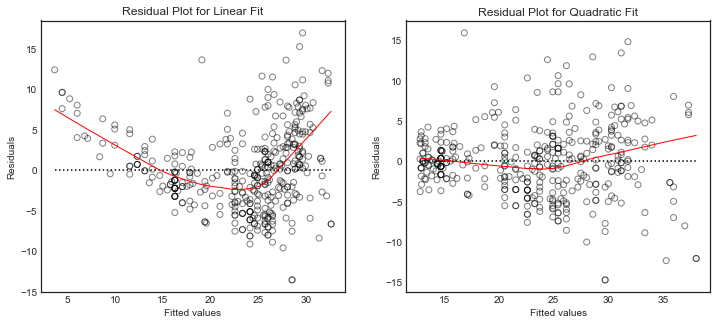

In [39]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
sns.regplot(auto.pred1, auto.resid1, lowess=True, 
            ax=ax1, line_kws={'color':'r', 'lw':1},
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax1.hlines(0,xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dotted')
ax1.set_title('Residual Plot for Linear Fit')

# Right plot
sns.regplot(auto.pred2, auto.resid2, lowess=True,
            line_kws={'color':'r', 'lw':1}, ax=ax2,
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax2.hlines(0,xmin=ax2.xaxis.get_data_interval()[0],
           xmax=ax2.xaxis.get_data_interval()[1], linestyles='dotted')
ax2.set_title('Residual Plot for Quadratic Fit')

for ax in fig.axes:
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')

>FIGURE 3.9. Plots of residuals versus predicted (or fitted) values for the Auto data set. In each plot, the red line is a smooth fit to the residuals, intended to make it easier to identify a trend. Left: A linear regression of mpg on horsepower. A strong pattern in the residuals indicates non-linearity in the data. Right: A linear regression of mpg on horsepower and $horsepower^2.$ There is little pattern in the residuals.


#### 2. Correlation of Error Terms 

An important assumption of the linear regression model is that the error terms, $\epsilon_1, \epsilon_2, \dots, \epsilon_n$, are uncorrelated. What does this mean? For instance, if the errors are uncorrelated, then the fact that $\epsilon_i$ is positive provides little or no information about the sign of $\epsilon_{i+1}$. The standard errors that are computed for the estimated regression coefficients or the fitted values are based on the assumption of uncorrelated error terms. If in fact there is correlation among the error terms, then ***the estimated standard errors will tend to underestimate the true standard errors***. As a result, ***confidence and prediction intervals will be narrower than they should be***. For example, a 95 % confidence interval may in reality have a much lower probability than 0.95 of containing the true value of the parameter. In addition, ***p-values associated with the model will be lower than they should be***; this could cause us to erroneously conclude that a parameter is statistically significant. In short, if the error terms are correlated, we may have an unwarranted sense of confidence in our model.

As an extreme example, suppose we accidentally doubled our data, leading to observations and error terms identical in pairs. If we ignored this, our standard error calculations would be as if we had a sample of size 2n, when in fact we have only n samples. Our estimated parameters would be the same for the 2n samples as for the n samples, but the confidence intervals would be narrower by a factor of $\sqrt{2}!$

Why might correlations among the error terms occur? Such correlations frequently occur in the context of time series data, which consists of observations for which measurements are obtained at discrete points in time. In many cases, observations that are obtained at adjacent time points will have positively correlated errors. In order to determine if this is the case for a given data set, we can plot the residuals from our model as a function of time. If the errors are uncorrelated, then there should be no discernible pattern. On the other hand, if the error terms are positively correlated, then we may see tracking in the residuals—that is, adjacent residuals may have similar values. Figure 3.10 provides an illustration. In the top panel, we see the residuals from a linear regression fit to data generated with uncorrelated errors. There is no evidence of a time-related trend in the residuals. In contrast, the residuals in the bottom panel are from a data set in which adjacent errors had a correlation of 0.9. Now there is a clear pattern in the residuals—adjacent residuals tend to take on similar values. Finally, the center panel illustrates a more moderate case in which the residuals had a correlation of 0.5. There is still evidence of tracking, but the pattern is less clear.

Many methods have been developed to properly take account of correlations in the error terms in time series data. Correlation among the error terms can also occur outside of time series data. For instance, consider a study in which individuals’ heights are predicted from their weights. The assumption of uncorrelated errors could be violated if some of the individuals in the study are members of the same family, or eat the same diet, or have been exposed to the same environmental factors. In general, the assumption of uncorrelated errors is extremely important for linear regression as well as for other statistical methods, and good experimental design is crucial in order to mitigate the risk of such correlations.


#### 3. Non-constant Variance of Error Terms

Another important assumption of the linear regression model is that the error terms have a constant variance, $Var(\epsilon_i) = \sigma^2$. The standard errors, confidence intervals, and hypothesis tests associated with the linear model rely upon this assumption.

Unfortunately, it is often the case that the variances of the error terms are non-constant. For instance, the variances of the error terms may increase with the value of the response. One can identify non-constant variances in the errors, or heteroscedasticity, from the presence of a funnel shape in
the residual plot. An example is shown in the left-hand panel of Figure 3.11,in which the magnitude of the residuals tends to increase with the fitted values. When faced with this problem, one possible solution is to transform the response Y using a concave function such as $log Y$ or $\sqrt{Y}$ . Such a transformation results in a greater amount of shrinkage of the larger responses, leading to a reduction in heteroscedasticity. The right-hand panel of Figure 3.11 displays the residual plot after transforming the response
using log Y . The residuals now appear to have constant variance, though there is some evidence of a slight non-linear relationship in the data.

there is some evidence of a slight non-linear relationship in the data. Sometimes we have a good idea of the variance of each response. For example, the ith response could be an average of ni raw observations. If each of these raw observations is uncorrelated with variance $\sigma^2$, then their average has variance $\sigma^2_i = \sigma^2/n_i$. In this case a simple remedy is to fit our model by weighted least squares, with weights proportional to the inverse
variances—i.e. wi = ni in this case. Most linear regression software allows for observation weights. 

#### 4. Outliers

An outlier is a point for which yi is far from the value predicted by the model. Outliers can arise for a variety of reasons, such as incorrect recording of an observation during data collection.

The red point (observation 20) in the left-hand panel of Figure 3.12 illustrates a typical outlier. The red solid line is the least squares regression fit, while the blue dashed line is the least squares fit after removal of the outlier. In this case, removing the outlier has little effect on the least squares line: it leads to almost no change in the slope, and a miniscule reduction in the intercept. It is typical for an outlier that does not have an unusual predictor value to have little effect on the least squares fit. However, even if an outlier does not have much effect on the least squares fit, it can cause other problems. For instance, in this example, the RSE is 1.09 when the outlier is included in the regression, but it is only 0.77 when the outlier is removed. Since the RSE is used to compute all confidence intervals and
p-values, such a dramatic increase caused by a single data point can have implications for the interpretation of the fit. Similarly, inclusion of the outlier causes the R2 to decline from 0.892 to 0.805.

Residual plots can be used to identify outliers. In this example, the outlier is clearly visible in the residual plot illustrated in the center panel of Figure 3.12. But in practice, it can be difficult to decide how large a residual needs to be before we consider the point to be an outlier. To address this problem, instead of plotting the residuals, ***we can plot the studentized residuals, computed by dividing each residual ei by its estimated standard
error***. Observations whose studentized residuals are greater than 3 in absolute value are possible outliers. In the right-hand panel of Figure 3.12, the outlier’s studentized residual exceeds 6, while all other observations have studentized residuals between −2 and 2.

If we believe that an outlier has occurred due to an error in data collection or recording, then one solution is to simply remove the observation. However, care should be taken, since an outlier may instead indicate a deficiency with the model, such as a missing predictor.

(Page 97). 

#### 5. High Leverage Points

We just saw that outliers are observations for which the response $y_i$ is unusual given the predictor xi. In contrast, observations with high leverage
have an unusual value for $x_i$. For example, observation 41 in the left-hand panel of Figure 3.13 has high leverage, in that the predictor value for this observation is large relative to the other observations. (Note that the data displayed in Figure 3.13 are the same as the data displayed in Figure 3.12, but with the addition of a single high leverage observation.) The red solid line is the least squares fit to the data, while the blue dashed line is the fit produced when observation 41 is removed. Comparing the left-hand panels of Figures 3.12 and 3.13, ***we observe that removing the high leverage observation has a much more substantial impact on the least squares line
than removing the outlier***. In fact, high leverage observations tend to have a sizable impact on the estimated regression line. It is cause for concern if the least squares line is heavily affected by just a couple of observations, because any problems with these points may invalidate the entire fit. For this reason, it is important to identify high leverage observations.

In a simple linear regression, high leverage observations are fairly easy to identify, since we can simply look for observations for which the predictor value is outside of the normal range of the observations. But in a multiple linear regression with many predictors, it is possible to have an observation that is well within the range of each individual predictor’s values, but that is unusual in terms of the full set of predictors. An example is shown in the center panel of Figure 3.13, for a data set with two predictors, X1 and X2. Most of the observations’ predictor values fall within the blue dashed ellipse, but the red observation is well outside of this range. But neither its value for X1 nor its value for X2 is unusual. So if we examine just X1 or just X2, we will fail to notice this high leverage point. This problem is more pronounced in multiple regression settings with more than two predictors, because then there is no simple way to plot all dimensions of the data simultaneously.

In order to quantify an observation’s leverage, we compute the leverage statistic. A large value of this statistic indicates an observation with high leverage. For a simple linear regression,

$$\large h_i = \frac{1}{n} + \frac{(x_i-\bar{x}^2}{\sum_{i'=1}^n(x_{i'}-\bar{x})^2}$$

It is clear from this equation that hi increases with the distance of $x_i$ from $\bar{x}$. There is a simple extension of $h_i$ to the case of multiple predictors, though we do not provide the formula here. The leverage statistic $h_i$ is always between $1/n$ and 1, and the average leverage for all the observations is always equal to $(p + 1)/n$. So if a given observation has a leverage statistic
that greatly exceeds $(p+1)/n$, then we may suspect that the corresponding point has high leverage.

The right-hand panel of Figure 3.13 provides a plot of the studentized residuals versus hi for the data in the left-hand panel of Figure 3.13. Observation 41 stands out as having a very high leverage statistic as well as a high studentized residual. In other words, it is an outlier as well as a high leverage observation. This is a particularly dangerous combination! This plot also reveals the reason that observation 20 had relatively little effect on the least squares fit in Figure 3.12: it has low leverage.


#### 6. Collinearity

Collinearity refers to the situation in which two or more predictor variables
are closely related to one another. The concept of collinearity is illustrated in Figure 3.14 using the Credit data set. In the left-hand panel of Figure 3.14, the two predictors limit and age appear to have no obvious relationship. In contrast, in the right-hand panel of Figure 3.14, the predictors limit and rating are very highly correlated with each other, and we say that they are collinear. The presence of collinearity can pose problems in the regression context, since it can be difficult to separate out the individual effects of collinear variables on the response. In other words, since limit and rating tend to increase or decrease together, it can be difficult to determine how each one separately is associated with the response, balance. 

Figure 3.15 illustrates some of the difficulties that can result from collinearity. The left-hand panel of Figure 3.15 is a contour plot of the RSS (3.22) associated with different possible coefficient estimates for the regression of balance on limit and age. Each ellipse represents a set of coefficients that correspond to the same RSS, with ellipses nearest to the center taking on the lowest values of RSS. The black dots and associated dashed
lines represent the coefficient estimates that result in the smallest possible RSS—in other words, these are the least squares estimates. The axes for limit and age have been scaled so that the plot includes possible coeffi- cient estimates that are up to four standard errors on either side of the least squares estimates. Thus the plot includes all plausible values for the coefficients. For example, we see that the true limit coefficient is almost certainly somewhere between 0.15 and 0.20. 

In contrast, the right-hand panel of Figure 3.15 displays contour plots of the RSS associated with possible coefficient estimates for the regression of balance onto limit and rating, which we know to be highly collinear. Now the contours run along a narrow valley; there is a broad range of values for the coefficient estimates that result in equal values for RSS. Hence a small change in the data could cause the pair of coefficient values that yield the smallest RSS—that is, the least squares estimates—to move anywhere along this valley. This results in a great deal of uncertainty in the coefficient estimates. Notice that the scale for the limit coefficient now runs from roughly −0.2 to 0.2; this is an eight-fold increase over the plausible range of the limit coefficient in the regression with age. Interestingly, even though the limit and rating coefficients now have much more individual uncertainty, they will almost certainly lie somewhere in this contour valley. For example, we would not expect the true value of the limit and rating coefficients to be −0.1 and 1 respectively, even though such a value is plausible for each coefficient individually.

Since collinearity reduces the accuracy of the estimates of the regression coefficients, it causes the standard error for $\hat{\beta}_j$ to grow. Recall that the decline in the t-statistic for each predictor is calculated by declining $\hat{\beta}_j$ by its standard error. Consequently, collinearity results in a decline in the t-statistics. As a result, in the presence of collinearity, we may fail to reject $H0 : \beta_j = 0$. This means that the power of the hypothesis test—the probability of correctly detecting a non-zero coefficient—is reduced by collinearity.

Table 3.11 compares the coefficient estimates obtained from two separate multiple regression models. The first is a regression of balance on age and limit, and the second is a regression of balance on rating and limit. In the first regression, both age and limit are highly significant with very small pvalues. In the second, the collinearity between limit and rating has caused the standard error for the limit coefficient estimate to increase by a factor of 12 and the p-value to increase to 0.701. In other words, the importance of the limit variable has been masked due to the presence of collinearity. To avoid such a situation, it is desirable to identify and address potential collinearity problems while fitting the model.

A simple way to detect collinearity is to look at the correlation matrix of the predictors. An element of this matrix that is large in absolute value indicates a pair of highly correlated variables, and therefore a collinearity problem in the data. Unfortunately, not all collinearity problems can be detected by inspection of the correlation matrix: it is possible for collinearity to exist between three or more variables even if no pair of variables has a particularly high correlation. We call this situation multicollinearity. multiInstead of inspecting the correlation matrix, a better way to assess multicollinearity is to compute the variance inflation factor (VIF). The VIF is the ratio of the variance of $\hat{\beta}_j$ when fitting the full model divided by the variance of $\hat{\beta}_j$ if fit on its own. The smallest possible value for VIF is 1, which indicates the complete absence of collinearity. Typically in practice there is a small amount of collinearity among the predictors. As a rule of thumb, a VIF value that exceeds 5 or 10 indicates a problematic amount of collinearity. The VIF for each variable can be computed using the formula

$$\large VIF(\hat{\beta}_j) = \frac{1}{1-R^2_{x_j|x_{-j}}}$$

where $R^2_{x_j|x_{-j}}$ is the $R^2$ from a regression of $X_j$ onto all of the other predictors. If $R^2_{x_j|x_{-j}}$ is close to one, then collinearity is present, and so the VIF will be large. In the Credit data, a regression of balance on age, rating, and limit indicates that the predictors have VIF values of 1.01, 160.67, and 160.59. As we suspected, there is considerable collinearity in the data! When faced with the problem of collinearity, there are two simple solutions. The first is to drop one of the problematic variables from the regression. This can usually be done without much compromise to the regression fit, since the presence of collinearity implies that the information that this variable provides about the response is redundant in the presence of the other variables. For instance, if we regress balance onto age and limit, without the rating predictor, then the resulting VIF values are close to the minimum possible value of 1, and the $R^2$ drops from 0.754 to 0.75. So dropping rating from the set of predictors has effectively solved the collinearity problem without compromising the fit. The second solution is to combine the collinear variables together into a single predictor. For instance, we might take the average of standardized versions of limit and rating in order to create a new variable that measures credit worthiness.


### Figure 3.14

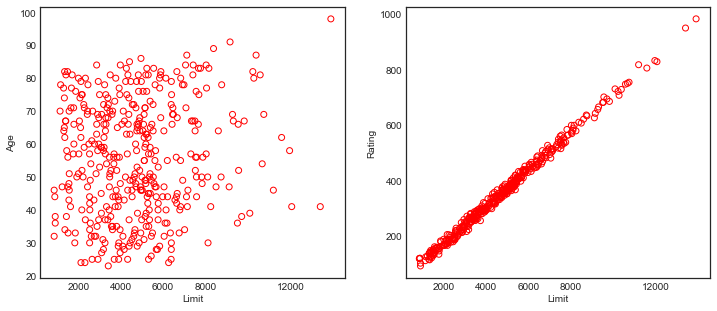

In [40]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
ax1.scatter(credit.Limit, credit.Age, facecolor='None', edgecolor='r')
ax1.set_ylabel('Age')

# Right plot
ax2.scatter(credit.Limit, credit.Rating, facecolor='None', edgecolor='r')
ax2.set_ylabel('Rating')

for ax in fig.axes:
    ax.set_xlabel('Limit')
    ax.set_xticks([2000,4000,6000,8000,12000])

### Figure 3.15

In [41]:
y = credit.Balance

# Regression for left plot
X = credit[['Age', 'Limit']].as_matrix()
regr1 = skl_lm.LinearRegression()
regr1.fit(scale(X.astype('float'), with_std=False), y)
print('Age/Limit\n',regr1.intercept_)
print(regr1.coef_)

# Regression for right plot
X2 = credit[['Rating', 'Limit']].as_matrix()
regr2 = skl_lm.LinearRegression()
regr2.fit(scale(X2.astype('float'), with_std=False), y)
print('\nRating/Limit\n',regr2.intercept_)
print(regr2.coef_)

Age/Limit
 520.0150000000001
[-2.29148553  0.17336497]

Rating/Limit
 520.015
[2.20167217 0.02451438]


In [42]:
# Create grid coordinates for plotting
B_Age = np.linspace(regr1.coef_[0]-3, regr1.coef_[0]+3, 100)
B_Limit = np.linspace(regr1.coef_[1]-0.02, regr1.coef_[1]+0.02, 100)

B_Rating = np.linspace(regr2.coef_[0]-3, regr2.coef_[0]+3, 100)
B_Limit2 = np.linspace(regr2.coef_[1]-0.2, regr2.coef_[1]+0.2, 100)

X1, Y1 = np.meshgrid(B_Limit, B_Age, indexing='xy')
X2, Y2 = np.meshgrid(B_Limit2, B_Rating, indexing='xy')
Z1 = np.zeros((B_Age.size,B_Limit.size))
Z2 = np.zeros((B_Rating.size,B_Limit2.size))

Limit_scaled = scale(credit.Limit.astype('float'), with_std=False)
Age_scaled = scale(credit.Age.astype('float'), with_std=False)
Rating_scaled = scale(credit.Rating.astype('float'), with_std=False)

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z1):
    Z1[i,j] =((y - (regr1.intercept_ + X1[i,j]*Limit_scaled +
                    Y1[i,j]*Age_scaled))**2).sum()/1000000
    
for (i,j),v in np.ndenumerate(Z2):
    Z2[i,j] =((y - (regr2.intercept_ + X2[i,j]*Limit_scaled +
                    Y2[i,j]*Rating_scaled))**2).sum()/1000000

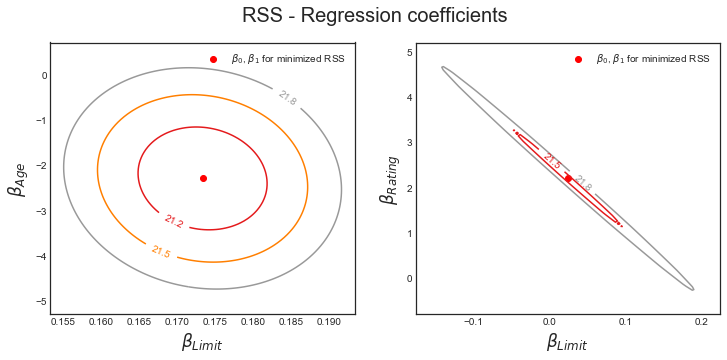

In [43]:
fig = plt.figure(figsize=(12,5))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
    
# Left plot
CS = ax1.contour(X1, Y1, Z1, cmap=plt.cm.Set1, levels=[21.25, 21.5, 21.8])
ax1.scatter(regr1.coef_[1], regr1.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
ax1.set_ylabel(r'$\beta_{Age}$', fontsize=17)

# Right plot
CS = ax2.contour(X2, Y2, Z2, cmap=plt.cm.Set1, levels=[21.5, 21.8])
ax2.scatter(regr2.coef_[1], regr2.coef_[0], c='r', label=min_RSS)
ax2.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
ax2.set_ylabel(r'$\beta_{Rating}$', fontsize=17)
ax2.set_xticks([-0.1, 0, 0.1, 0.2])

for ax in fig.axes:
    ax.set_xlabel(r'$\beta_{Limit}$', fontsize=17)
    ax.legend()

### Variance Inflation Factor - page 102

In [44]:
est_Age = smf.ols('Age ~ Rating + Limit', credit).fit()
est_Rating = smf.ols('Rating ~ Age + Limit', credit).fit()
est_Limit = smf.ols('Limit ~ Age + Rating', credit).fit()

print(1/(1-est_Age.rsquared))
print(1/(1-est_Rating.rsquared))
print(1/(1-est_Limit.rsquared))

1.0113846860681328
160.66830095856935
160.59287978597942


## 3.6 Lab: Linear Regression

### 3.6.1 Libraries

### 3.6.2 Simple Linear Regression

the Boston data set, which records medv (median house value) for 506 neighborhoods around Boston. We will seek to predict medv using 13 predictors such as rm (average number of rooms per house), age (average age of houses), and lstat (percent of households with low socioeconomic status).


In [132]:
Boston = pd.read_csv('data/Boston.csv', header=0)
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [136]:
lm = smf.ols('medv~lstat', Boston).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 24 May 2018   Prob (F-statistic):           5.08e-88
Time:                        22:24:03   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

In [138]:
dir(lm)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',


In [139]:
lm.params

Intercept    34.553841
lstat        -0.950049
dtype: float64

In order to obtain a confidence interval for the coefficient estimates,

(Page 111). 

In [143]:
lm.conf_int()

,0,1
Intercept,33.448457,35.659225
lstat,-1.026148,-0.873951


The predict() function can be used to produce confidence intervals and prediction intervals for the prediction of medv for a given value of lstat.

(Page 111). 

In [145]:
lm.predict(pd.DataFrame({'lstat':[5, 10, 15]}))

0    29.803594
1    25.053347
2    20.303101
dtype: float64

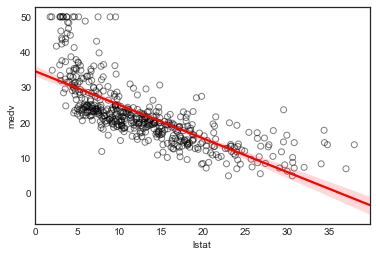

In [169]:
sns.regplot(Boston.lstat, Boston.medv, scatter_kws={'color':'r', 'facecolors':'None', 'edgecolors':'k', 'alpha':0.5}, line_kws={'color':'r'})


Text(0,0.5,'Residuals_pearson')

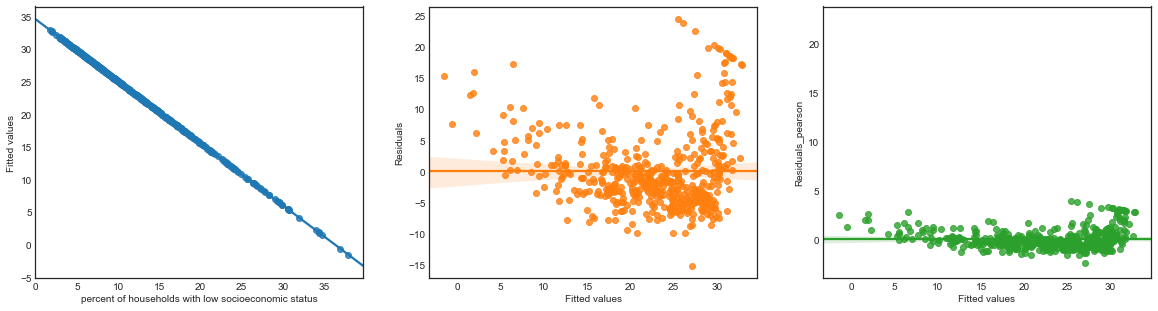

In [170]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(20,5))

sns.regplot(Boston.lstat, lm.predict(),'ro', ax=ax1)
ax1.set_xlabel('percent of households with low socioeconomic status')
ax1.set_ylabel('Fitted values')

sns.regplot(lm.predict(), lm.resid, 'go', ax=ax2)
ax2.set_xlabel('Fitted values')
ax2.set_ylabel('Residuals')

sns.regplot(lm.predict(), lm.resid_pearson, 'bo',ax=ax3)
ax3.set_xlabel('Fitted values')
ax3.set_ylabel('Residuals_pearson')

The following identifies the observation with the largest leverage

In [175]:
np.argmax(lm.get_influence().hat_matrix_diag)

374

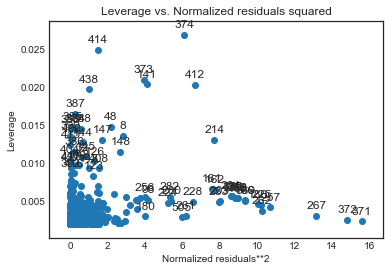

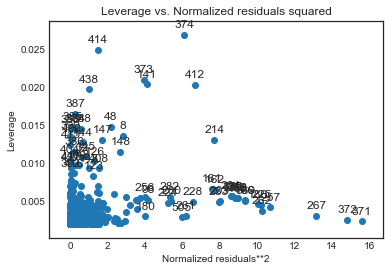

In [184]:
from statsmodels.graphics.regressionplots import *

plot_leverage_resid2(lm)

In [185]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 24 May 2018   Prob (F-statistic):           5.08e-88
Time:                        23:04:17   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3.6.3 Multiple Linear Regression

In [188]:
lm = smf.ols ('medv~lstat+age', data = Boston).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Thu, 24 May 2018   Prob (F-statistic):           2.98e-88
Time:                        23:05:49   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

In [191]:
all_columns = "+".join(Boston.columns.difference(["medv"]))
my_formula = "medv~" + all_columns
lm = smf.ols(my_formula, data=Boston).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 24 May 2018   Prob (F-statistic):          6.72e-135
Time:                        23:08:03   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

Unlike R, Python is not fully up speeded to all the statistics. If you want to have the VIF of the variables in LM, you have to code a little bit.

In [192]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [194]:
y, X = dmatrices(my_formula, data=Boston, return_type='dataframe')
vif_coeff = {}
for i in range(X.shape[1]):
    vif_coeff[X.columns[i]] = variance_inflation_factor(np.array(X.dropna()),i)
print (vif_coeff)

{'Intercept': 585.2652379423121, 'age': 3.1008255128153364, 'black': 1.3485210764063753, 'chas': 1.0739953275537886, 'crim': 1.7921915474332406, 'dis': 3.9559449063727263, 'indus': 3.9915964183460315, 'lstat': 2.9414910780919366, 'nox': 4.393719847577495, 'ptratio': 1.7990840492488984, 'rad': 7.484496335274472, 'rm': 1.9337444357832565, 'tax': 9.00855394759707, 'zn': 2.298758178749441}


### 3.6.4 Interaction Terms

In [201]:
lm = smf.ols('medv~lstat * age', data=Boston).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Thu, 24 May 2018   Prob (F-statistic):           4.86e-88
Time:                        23:14:44   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

### 3.6.5 Non-linear Transformations of the Predictors

The function $I()$ is needed since the $\hat{}$ has a special meaning in a formula; wrapping as we do allows the standard usage in R, which is to raise $X$ to the power 2. We now perform a regression of $medv$ onto $lstat$ and $lstat^2$.

(Page 115). 

In [206]:
lm_order1 = smf.ols('medv ~ lstat', Boston).fit()
lm_order2 = smf.ols('medv ~ lstat + I(lstat**2)', Boston).fit()
print(lm_order2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Thu, 24 May 2018   Prob (F-statistic):          1.56e-112
Time:                        23:21:02   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149

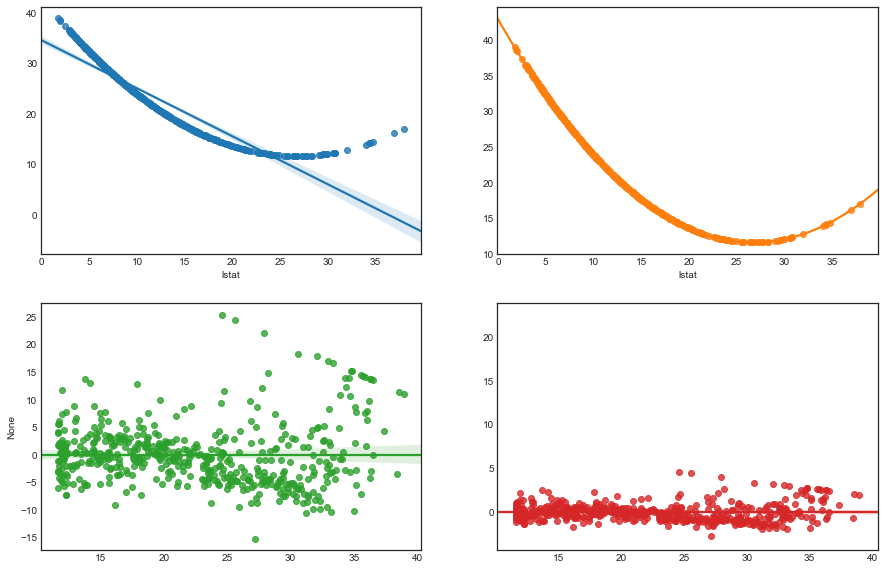

In [220]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,10))

sns.regplot(Boston.lstat,        lm_order2.predict(), order=1, ax=ax1)
sns.regplot(Boston.lstat,        lm_order2.predict(), order=2, ax=ax2)
sns.regplot(lm_order2.predict(), lm_order2.resid,              ax=ax3)
sns.regplot(lm_order2.predict(), lm_order2.resid_pearson,      ax=ax4)

The anova() function performs a hypothesis test comparing the two models. The null hypothesis is that the two models fit the data equally well, and the alternative hypothesis is that the full model is superior. Here the F-statistic is 135 and the associated p-value is virtually zero. This provides very clear evidence that the model containing the predictors $lstat$ and $lstat^2$ is far superior to the model that only contains the predictor $lstat$. This is not surprising, since earlier we saw evidence for non-linearity in the relationship between $medv$ and $lstat$. 

In [208]:
import statsmodels.api as sm

table = sm.stats.anova_lm(lm_order1, lm_order2)
print(table)

C:\Users\idsoo\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\idsoo\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\idsoo\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


   df_resid           ssr  df_diff     ss_diff           F        Pr(>F)
0     504.0  19472.381418      0.0         NaN         NaN           NaN
1     503.0  15347.243158      1.0  4125.13826  135.199822  7.630116e-28


In [210]:
lm_log = smf.ols('medv ~ np.log(rm)', Boston).fit()
print(lm_log.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Thu, 24 May 2018   Prob (F-statistic):           1.22e-64
Time:                        23:28:48   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.4878      5.028    -15.213      0.0

### 3.6.6 Qualitative Predictors

We will attempt to predict Sales (child car seat sales) in 400 locations based on a number of predictors. The Carseats data includes qualitative predictors such as Shelveloc, an indicator of the quality of the shelving location—that is, the space within a store in which the car seat is displayed—at each location. The predictor Shelveloc takes on three possible values, Bad, Medium, and Good.


In [224]:
Carseats = pd.read_csv('data/Carseats.csv', header=0)
Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [225]:
list(Carseats)

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [227]:
lm_carseats = smf.ols('Sales ~ Income + Advertising + Price + Age', Carseats).fit()
print(lm_carseats.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     58.21
Date:                Thu, 24 May 2018   Prob (F-statistic):           1.33e-38
Time:                        23:48:57   Log-Likelihood:                -889.67
No. Observations:                 400   AIC:                             1789.
Df Residuals:                     395   BIC:                             1809.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      15.1829      0.777     19.542      

let us create dummy variables using get_dummies, then exclude the first dummy column

In [228]:
ShelveLoc_dummies = pd.get_dummies(Carseats.ShelveLoc, prefix='ShelveLoc').iloc[:,1:]
ShelveLoc_dummies

,ShelveLoc_Good,ShelveLoc_Medium
0,0,0
1,1,0
2,0,1
3,0,1
4,0,0
...,...,...
395,1,0
396,0,1
397,0,1
398,0,0


In [230]:
Carseats_dummy = pd.concat([Carseats, ShelveLoc_dummies], axis=1)
Carseats_dummy

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,0,0
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1,0
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,0,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0,1
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,1,0
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,0,1
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,0,1
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,0,0


Then the model buliding will be the same with all numerrical variables.

In [231]:
lm_carseats_dummy = smf.ols('Sales ~ Income + Advertising + Price + Age + ShelveLoc_Good + ShelveLoc_Medium',
                             Carseats_dummy).fit()
print(lm_carseats_dummy.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     158.3
Date:                Thu, 24 May 2018   Prob (F-statistic):          1.33e-101
Time:                        23:55:01   Log-Likelihood:                -736.58
No. Observations:                 400   AIC:                             1487.
Df Residuals:                     393   BIC:                             1515.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           13.4006      0.545  

statsmodels has the built-in support for categorical variables, just add C() to indicate that the variable will be categorical.

In [232]:
lm_carseats_wo_dummy = smf.ols('Sales ~ Income + Advertising + Price + Age + C(ShelveLoc)', 
                            data = Carseats).fit()

In [233]:
print(lm_carseats_wo_dummy.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     158.3
Date:                Thu, 24 May 2018   Prob (F-statistic):          1.33e-101
Time:                        23:58:28   Log-Likelihood:                -736.58
No. Observations:                 400   AIC:                             1487.
Df Residuals:                     393   BIC:                             1515.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 13